In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
file_path = "Resume.csv"  # Replace with the actual path
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details May 2013 to May 2017 B.E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary..."


In [13]:
# Cleaning function for the Resume column
def clean_text(text):
    """
    Cleans text by:
    - Removing extra spaces
    - Replacing ambiguous characters
    - Normalizing text
    """
    if isinstance(text, str):
        # Replace newline and carriage return with space
        text = re.sub(r'\n|\r', ' ', text)
        # Remove ambiguous characters
        text = text.replace('â¢', ' ').replace('NaÃ¯ve', 'Naive')
        # Remove special characters and multiple spaces
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to the Resume column
df['Cleaned_Resume'] = df['Resume'].apply(clean_text)

# Display the cleaned data
df[['Category', 'Cleaned_Resume']].head()


,Category,Cleaned_Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...


In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Missing Values:
 Category          0
Resume            0
Cleaned_Resume    0
dtype: int64
Number of duplicate rows: 796


Number of unique categories: 25
Category Distribution:
 Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


C:\Users\imane\AppData\Local\Temp\ipykernel_3752\3722423925.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index, x=category_counts.values, palette="viridis")


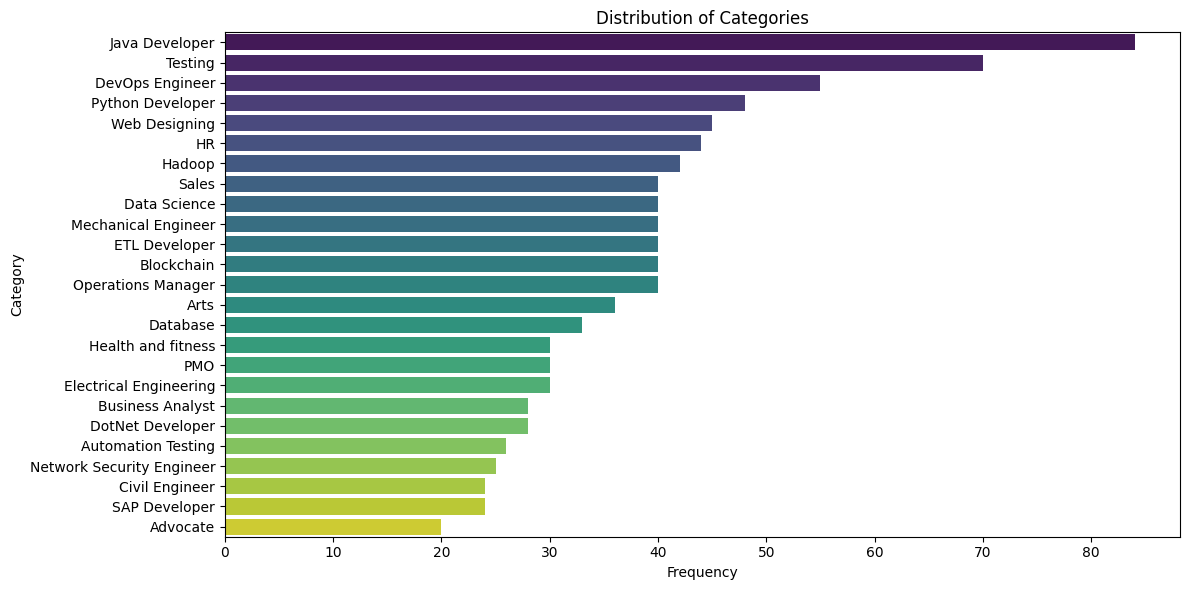

In [15]:
# Count unique categories
unique_categories = df['Category'].nunique()
print(f"Number of unique categories: {unique_categories}")

# Display the frequency of each category
category_counts = df['Category'].value_counts()
print("Category Distribution:\n", category_counts)

# Bar plot of category distribution
plt.figure(figsize=(12, 6))
sns.barplot(y=category_counts.index, x=category_counts.values, palette="viridis")
plt.title("Distribution of Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


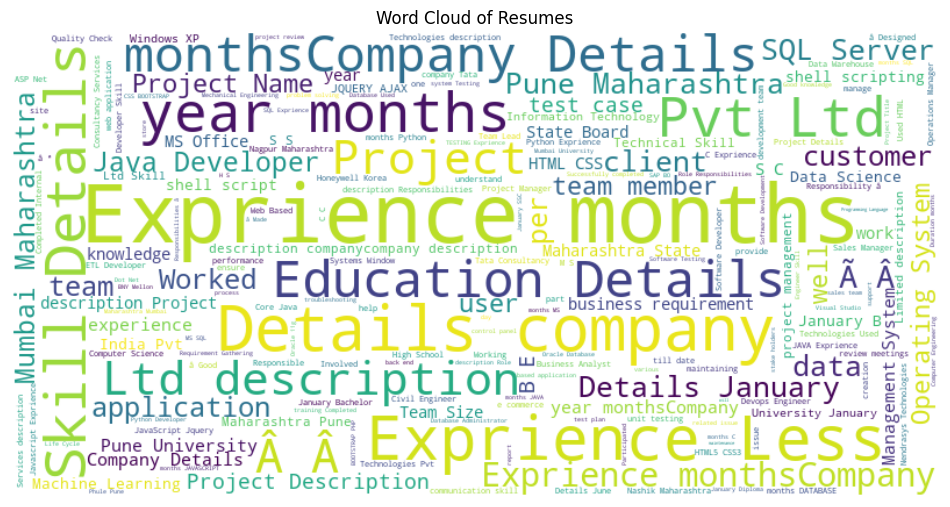

In [16]:
# Generate a word cloud from the cleaned Resume column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Resume']))

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Resumes")
plt.show()


Top 10 Skills:
 SQL                 990
Java                773
Python              573
JAVA                193
AWS                 152
R                   137
Data Science        130
Excel               122
java                110
Machine Learning     88
Name: count, dtype: int64


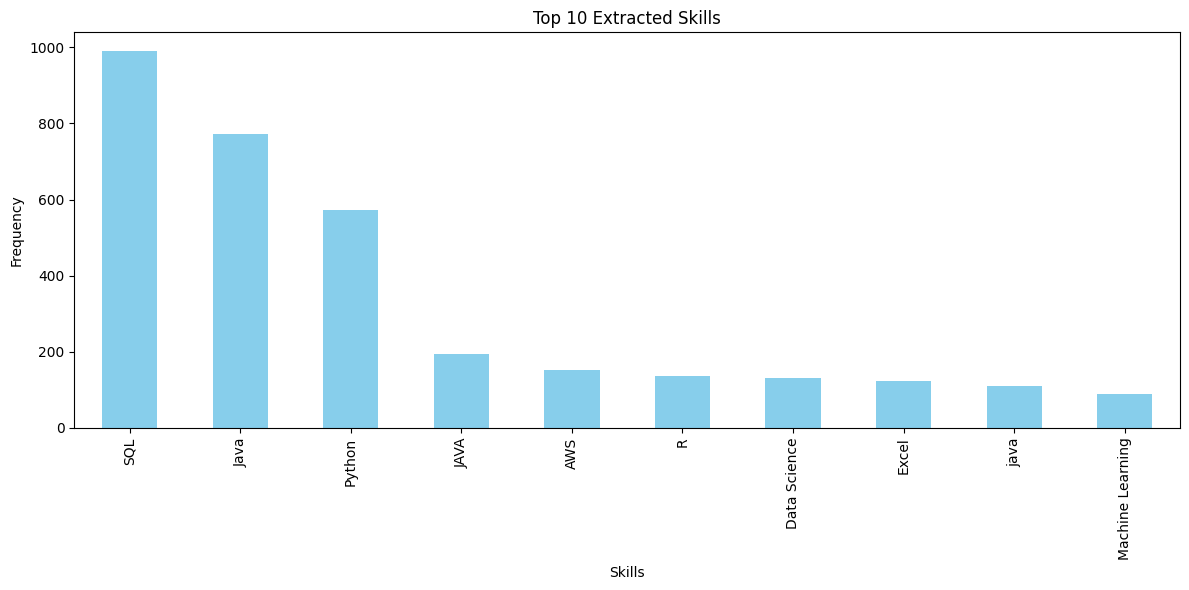

In [17]:
# Extract the most common skills
def extract_skills(resume_text):
    skills = re.findall(r'\b(Java|Python|SQL|C\+\+|Machine Learning|Data Science|Tableau|AWS|Excel|R|NLP)\b', resume_text, re.IGNORECASE)
    return skills

# Apply skill extraction
df['Extracted_Skills'] = df['Cleaned_Resume'].apply(extract_skills)

# Count the frequency of extracted skills
all_skills = [skill for skills in df['Extracted_Skills'] for skill in skills]
skills_series = pd.Series(all_skills).value_counts()

# Display the top 10 skills
print("Top 10 Skills:\n", skills_series.head(10))

# Bar plot of top skills
plt.figure(figsize=(12, 6))
skills_series.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Extracted Skills")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


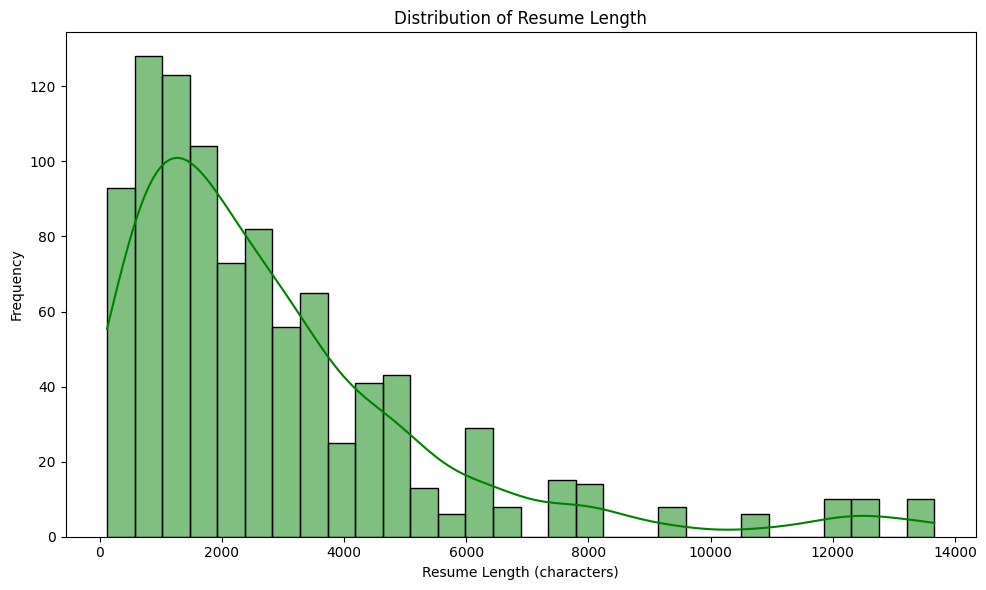

In [18]:
# Add a column for resume length
df['Resume_Length'] = df['Cleaned_Resume'].apply(len)

# Plot the distribution of resume length
plt.figure(figsize=(10, 6))
sns.histplot(df['Resume_Length'], kde=True, color='green', bins=30)
plt.title("Distribution of Resume Length")
plt.xlabel("Resume Length (characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [19]:
# Function to extract specific sections from resumes
def extract_sections(resume_text):
    """
    Extract Experience, Skills, and Education sections from the Resume text.
    """
    sections = {"Experience": None, "Skills": None, "Education": None}

    if isinstance(resume_text, str):
        # Extract Experience
        experience_pattern = r"(experience|work history|employment|professional experience|expériences? professionnelles?).*"
        experience_match = re.search(experience_pattern, resume_text, re.IGNORECASE | re.DOTALL)
        sections["Experience"] = experience_match.group(0) if experience_match else "Not Found"

        # Extract Skills
        skills_pattern = r"(skills|technical skills|competencies|abilities|expertise|competences).*"
        skills_match = re.search(skills_pattern, resume_text, re.IGNORECASE | re.DOTALL)
        sections["Skills"] = skills_match.group(0) if skills_match else "Not Found"

        # Extract Education
        education_pattern = r"(education|academic qualifications|degrees|formation).*"
        education_match = re.search(education_pattern, resume_text, re.IGNORECASE | re.DOTALL)
        sections["Education"] = education_match.group(0) if education_match else "Not Found"

    return sections

# Apply the extraction function
df['Extracted_Experience'] = df['Resume'].apply(lambda x: extract_sections(x)['Experience'])
df['Extracted_Skills'] = df['Resume'].apply(lambda x: extract_sections(x)['Skills'])
df['Extracted_Education'] = df['Resume'].apply(lambda x: extract_sections(x)['Education'])

# Display a sample of the extracted sections
df[['Category', 'Extracted_Experience', 'Extracted_Skills', 'Extracted_Education']].head()


,Category,Extracted_Experience,Extracted_Skills,Extracted_Education
0,Data Science,Not Found,Skills * Programming Languages: Python (pandas...,Education Details Data Science Assurance Assoc...
1,Data Science,Not Found,Not Found,Education Details May 2013 to May 2017 B.E UIT...
2,Data Science,Not Found,"Technical Skills Programming Matlab, Python an...",Education Details January 2019 B.Tech. Electri...
3,Data Science,Experience Industry: Analytics - Cross Industr...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Education Details January 2017 to January 2018...
4,Data Science,Not Found,Not Found,"Education Details MCA YMCAUST, Faridabad, Hary..."


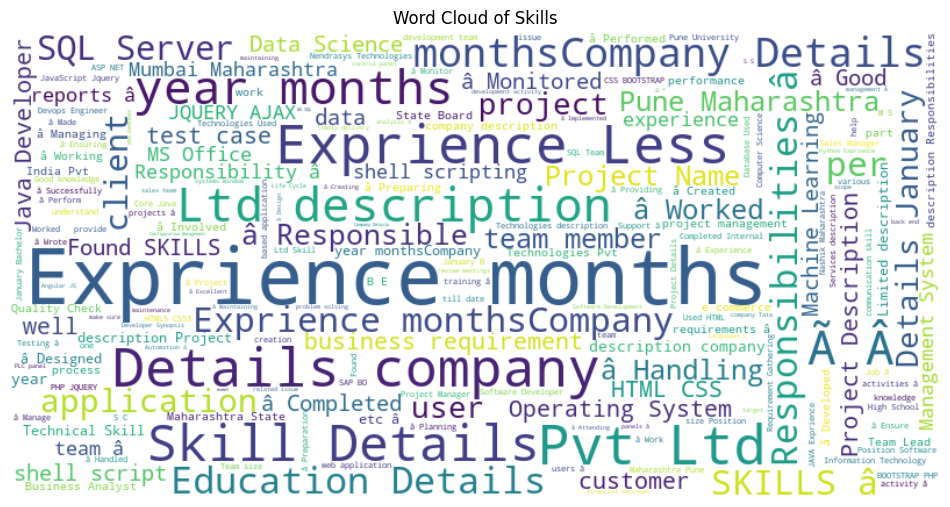

In [20]:
# Word cloud for common skills
def plot_skills_wordcloud(dataframe, column):
    """
    Generate a word cloud for the Skills column.
    """
    skills_text = ' '.join(dataframe[column].dropna())

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(skills_text)

    # Display the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Skills")
    plt.show()

# Apply the visualization to the Extracted_Skills column
plot_skills_wordcloud(df, "Extracted_Skills")


C:\Users\imane\AppData\Local\Temp\ipykernel_3752\3851836616.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skills_counts.values, y=skills_counts.index, palette="viridis")


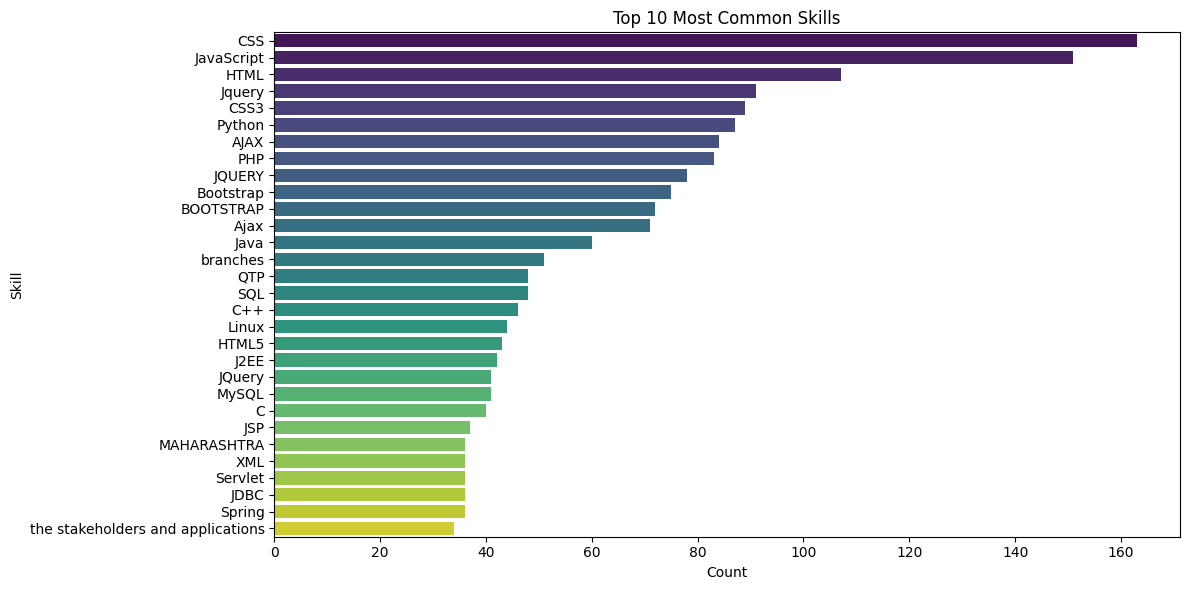

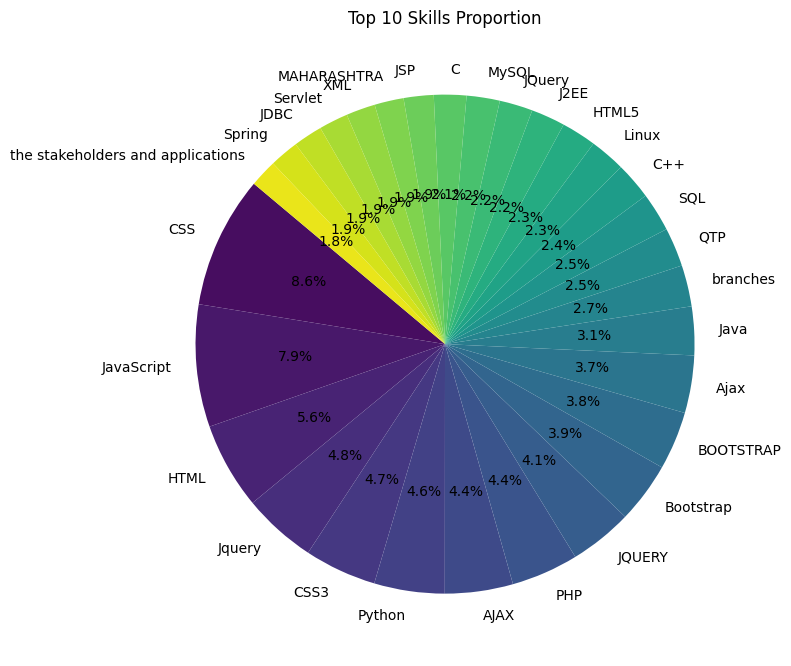

In [25]:
def plot_skills_distribution(dataframe, column):
    """
    Visualize the distribution of the most common skills using bar and pie charts.
    """
    # Combine all skills into one string, split into individual skills, and count occurrences
    skills_text = ' '.join(dataframe[column].dropna())
    skills_list = [skill.strip() for skill in skills_text.split(",")]
    skills_counts = pd.Series(skills_list).value_counts().head(30)  # Top 10 skills

    # Bar Chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=skills_counts.values, y=skills_counts.index, palette="viridis")
    plt.title("Top 10 Most Common Skills")
    plt.xlabel("Count")
    plt.ylabel("Skill")
    plt.tight_layout()
    plt.show()

    # Pie Chart
    plt.figure(figsize=(8, 8))
    skills_counts.plot.pie(
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(skills_counts))
    )
    plt.title("Top 10 Skills Proportion")
    plt.ylabel("")  # Remove default y-axis label
    plt.tight_layout()
    plt.show()

# Apply the visualization to the Extracted_Skills column
plot_skills_distribution(df, "Extracted_Skills")


C:\Users\imane\AppData\Local\Temp\ipykernel_3752\1331754587.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=degree_counts.values, y=degree_counts.index, palette="coolwarm")


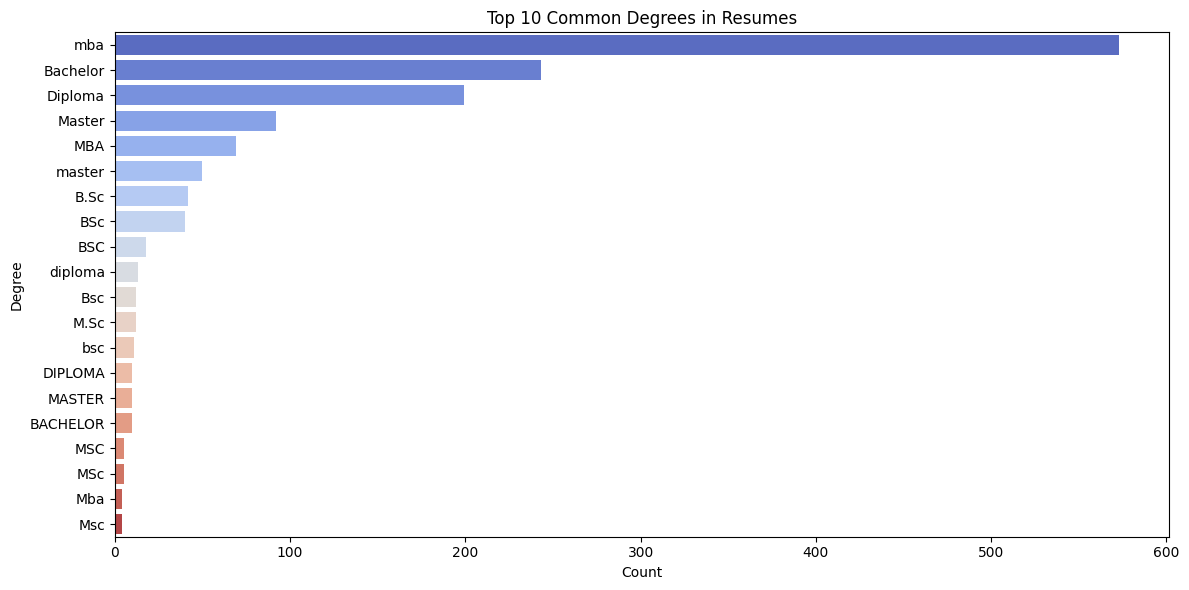

In [26]:
# Extract common degrees from the Education column
def extract_degrees(text):
    degree_pattern = r"(B\.?Sc|M\.?Sc|PhD|Bachelor|Master|Diploma|MBA)"
    matches = re.findall(degree_pattern, str(text), re.IGNORECASE)
    return matches

# Apply degree extraction and count frequencies
df['Extracted_Degrees'] = df['Extracted_Education'].apply(extract_degrees)
all_degrees = [degree for degrees in df['Extracted_Degrees'] for degree in degrees]
degree_counts = pd.Series(all_degrees).value_counts().head(30)

# Plot the top degrees
plt.figure(figsize=(12, 6))
sns.barplot(x=degree_counts.values, y=degree_counts.index, palette="coolwarm")
plt.title("Top 10 Common Degrees in Resumes")
plt.xlabel("Count")
plt.ylabel("Degree")
plt.tight_layout()
plt.show()


In [22]:
# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_resume_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_resume_dataset.csv'")


Cleaned dataset saved as 'cleaned_resume_dataset.csv'


In [28]:
# Remove the 'Resume' column from the dataset
df = df.drop(columns=["Extracted_Skills","Resume_Length","Extracted_Experience","Extracted_Education","Extracted_Degrees"])

# Display the first few rows to confirm the column is removed
print(df.head())

# Save the updated dataset to a new file if needed
df.to_csv("clean_Resume.csv", index=False)
print("Updated dataset saved as 'updated_resume_dataset.csv'")


       Category                                     Cleaned_Resume
0  Data Science  Skills Programming Languages Python pandas num...
1  Data Science  Education Details May 2013 to May 2017 B E UIT...
2  Data Science  Areas of Interest Deep Learning Control System...
3  Data Science  Skills R Python SAP HANA Tableau SAP HANA SQL ...
4  Data Science  Education Details MCA YMCAUST Faridabad Haryan...
Updated dataset saved as 'updated_resume_dataset.csv'
